缺风险因子相关数据，待完成。

In [1]:
import pyfolio as pf
# %matplotlib inline
import gzip
import os
import pandas as pd
import numpy as np

# 数据

In [2]:
transactions = pd.read_csv(gzip.open('../tests/test_data/test_txn.csv.gz'),
                    index_col=0, parse_dates=True)
positions = pd.read_csv(gzip.open('../tests/test_data/test_pos.csv.gz'),
                    index_col=0, parse_dates=True)
returns = pd.read_csv(gzip.open('../tests/test_data/test_returns.csv.gz'),
                      index_col=0, parse_dates=True, header=None)[1]

In [3]:
transactions.index = transactions.index + pd.Timedelta(days=10*365)
positions.index = positions.index + pd.Timedelta(days=10*365)
returns.index = returns.index + pd.Timedelta(days=10*365)

In [4]:
positions

,AMD,CERN,COST,DELL,GPS,INTC,MMM,cash
index,,,,,,,,
2014-01-06 00:00:00+00:00,6961.92,21017.078750,7282.266152,21264.55188,7091.080020,21259.333890,21316.129606,-6192.360298
2014-01-09 00:00:00+00:00,18198.58,18071.250000,17675.836401,10804.31924,10685.411865,17872.477480,10882.026400,-3329.289887
2014-01-10 00:00:00+00:00,12060.86,11942.246250,12838.477446,16078.90380,16272.139000,12465.392511,12579.135758,4708.039735
2014-01-11 00:00:00+00:00,13102.40,15534.281250,14447.422640,15414.45080,15666.440185,14884.069620,13454.542620,-2749.470030
2014-01-12 00:00:00+00:00,15518.40,14547.050000,14164.039680,14407.48813,14926.122619,14422.385864,13929.159049,-2462.919316
...,...,...,...,...,...,...,...,...
2019-12-22 00:00:00+00:00,-1199.11,1316.857500,22778.660580,-3562.47039,76601.638113,36280.269375,17740.890304,16350.679211
2019-12-26 00:00:00+00:00,589.80,673.840032,24170.422856,-1765.41500,83143.517604,37499.607147,15692.520137,7641.201795
2019-12-27 00:00:00+00:00,292.50,334.920016,20993.396552,858.85252,94500.729990,50509.461877,7946.648597,-6583.290764


In [5]:
factor_loadings = pd.read_csv(
    '../tests/test_data/factor_loadings.csv',
    index_col=[0, 1], parse_dates=True
)

factor_returns = pd.read_csv(
    '../tests/test_data/factor_returns.csv',
    index_col=0, parse_dates=True
)


In [6]:
factor_returns.index = factor_returns.index.tz_localize('UTC')
# factor_loadings.index = factor_loadings.index.tz_localize('UTC')

In [7]:
factor_returns

,materials,financials
2016-01-04 00:00:00+00:00,1.764052,0.400157
2016-01-05 00:00:00+00:00,0.978738,2.240893
2016-01-06 00:00:00+00:00,1.867558,-0.977278
2016-01-07 00:00:00+00:00,0.950088,-0.151357
2016-01-08 00:00:00+00:00,-0.103219,0.410599
...,...,...
2017-12-01 00:00:00+00:00,-1.147611,-0.358114
2017-12-04 00:00:00+00:00,0.555963,0.892474
2017-12-05 00:00:00+00:00,-0.422315,0.104714
2017-12-06 00:00:00+00:00,0.228053,0.201480


In [8]:
MAPS = {19001:'DELL',19002:'GPS'}

In [9]:
columns = factor_loadings.columns

In [10]:
tickers = [MAPS[x] for x in factor_loadings.index.get_level_values(1)]

In [11]:
arrays = [factor_loadings.index.get_level_values(0).tz_localize('UTC'), tickers]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['dt', 'ticker'])

In [12]:
factor_loadings = pd.DataFrame(data=factor_loadings.values, index=index,columns=columns)

In [13]:
factor_loadings

materials  financials
dt                        ticker                       
2016-01-04 00:00:00+00:00 DELL          1.0         1.0
                          GPS           1.0         1.0
2016-01-05 00:00:00+00:00 DELL          1.0         1.0
                          GPS           1.0         1.0
2016-01-06 00:00:00+00:00 DELL          1.0         1.0
...                                     ...         ...
2017-12-05 00:00:00+00:00 GPS           1.0         1.0
2017-12-06 00:00:00+00:00 DELL          1.0         1.0
                          GPS           1.0         1.0
2017-12-07 00:00:00+00:00 DELL          1.0         1.0
                          GPS           1.0         1.0

[1008 rows x 2 columns]

In [14]:
start_date = factor_loadings.index.get_level_values(0).min()
end_date = factor_loadings.index.get_level_values(0).max()

In [15]:
returns = returns.loc[start_date:end_date]
positions = positions.loc[start_date:end_date,:]

In [16]:
positions

,AMD,CERN,COST,DELL,GPS,INTC,MMM,cash
index,,,,,,,,
2016-01-04 00:00:00+00:00,0.000000,1804.82625,50409.651241,26527.45990,40681.915404,981.828950,19753.831479,-2440.744923
2016-01-07 00:00:00+00:00,0.000000,941.03625,50652.418750,27176.78574,39459.543362,-493.899900,21203.944950,-238.008728
2016-01-08 00:00:00+00:00,593.810000,469.95000,53799.852366,23806.25540,40861.286310,-253.432049,21500.017792,-2552.159542
2016-01-09 00:00:00+00:00,326.430000,-223.39250,54049.807749,17013.87689,46638.534930,214.606689,21578.124162,820.068017
2016-01-10 00:00:00+00:00,-141.399992,5282.92000,45836.891028,19173.70860,37501.845400,9652.643862,23629.706121,-1688.950646
...,...,...,...,...,...,...,...,...
2017-12-01 00:00:00+00:00,61669.750000,32361.85000,5823.295362,-1963.33442,-35.631112,613.006350,59357.121955,2984.435554
2017-12-02 00:00:00+00:00,61621.560000,31669.45500,5921.193239,1011.20047,-17.361383,-317.104395,59745.295750,131.512689
2017-12-03 00:00:00+00:00,64877.710000,30519.25500,5846.125500,530.97880,0.000000,152.113808,59325.926946,731.182157


# `perf_attrib`

In [17]:
risk_exposures_portfolio, perf_attribution = pf.perf_attrib.perf_attrib(returns, positions, factor_returns, factor_loadings)

In [18]:
risk_exposures_portfolio

,materials,financials
dt,,
2016-01-04 00:00:00+00:00,1.037684,1.037684
2016-01-05 00:00:00+00:00,0.000000,0.000000
2016-01-06 00:00:00+00:00,0.000000,0.000000
2016-01-07 00:00:00+00:00,1.003585,1.003585
2016-01-08 00:00:00+00:00,1.041087,1.041087
...,...,...
2017-12-01 00:00:00+00:00,-2.028439,-2.028439
2017-12-04 00:00:00+00:00,-2.040378,-2.040378
2017-12-05 00:00:00+00:00,0.000000,0.000000


In [19]:
perf_attribution

,materials,financials,total_returns,common_returns,specific_returns,tilt_returns,timing_returns
2016-01-04 00:00:00+00:00,1.830529,0.415237,0.003820,2.245766,-2.241945,1.178717,1.067049
2016-01-05 00:00:00+00:00,0.000000,0.000000,NaN,0.000000,NaN,1.753543,-1.753543
2016-01-06 00:00:00+00:00,0.000000,-0.000000,NaN,0.000000,NaN,0.484883,-0.484883
2016-01-07 00:00:00+00:00,0.953494,-0.151900,0.007138,0.801594,-0.794456,0.435022,0.366573
2016-01-08 00:00:00+00:00,-0.107460,0.427469,-0.003434,0.320009,-0.323443,0.167412,0.152598
...,...,...,...,...,...,...,...
2017-12-01 00:00:00+00:00,2.327858,0.726412,-0.019236,3.054271,-3.073507,-0.820079,3.874350
2017-12-04 00:00:00+00:00,-1.134374,-1.820984,0.006474,-2.955359,2.961833,0.788878,-3.744236
2017-12-05 00:00:00+00:00,-0.000000,0.000000,NaN,0.000000,NaN,-0.172978,0.172978
2017-12-06 00:00:00+00:00,0.000000,0.000000,NaN,0.000000,NaN,0.233941,-0.233941


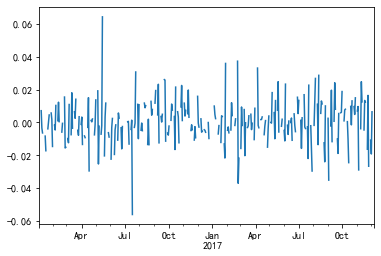

In [20]:
perf_attribution['total_returns'].plot()

In [21]:
pf.perf_attrib.show_perf_attrib_stats(returns,positions,factor_returns,factor_loadings)

统计摘要,
年化特定收益率,948.73%
年化共同收益率,246283.40%
年化总收益率,1.95%
特定夏普比率,-0.29


风险敞口摘要,平均风险敞口,年化收益率,累积收益率
materials,0.54,-100.00%,-100.00%
financials,0.54,-100.00%,-100.00%


# `create_perf_attrib_tear_sheet`

In [22]:
pf.create_perf_attrib_tear_sheet(returns,positions,factor_returns,factor_loadings)

## 相对于共同风险因子的绩效

统计摘要,
年化特定收益率,948.73%
年化共同收益率,246283.40%
年化总收益率,1.95%
特定夏普比率,-0.29


风险敞口摘要,平均风险敞口,年化收益率,累积收益率
materials,0.54,-100.00%,-100.00%
financials,0.54,-100.00%,-100.00%


In [23]:
fig = pf.perf_attrib.plot_alpha_returns(returns)

In [24]:
fig.show()